In [10]:
import datetime

# Diccionario para almacenar los pedidos
pedidos = {}

def crear_pedido(numero_pedido, cliente, productos):
    """Crea un nuevo pedido y registra su estado inicial."""
    if numero_pedido in pedidos:
        print(f"Error: El pedido {numero_pedido} ya existe.")
        return

    pedidos[numero_pedido] = {
        "cliente": cliente,
        "productos": productos,
        "estado": "Pedido tomado",
        "historial_trazabilidad": [
            {"estado": "Pedido tomado", "fecha_hora": datetime.datetime.now()}
        ],
        "factura": None
    }
    print(f"Pedido {numero_pedido} creado para {cliente}.")

def actualizar_estado_pedido(numero_pedido, nuevo_estado):
    """Actualiza el estado de un pedido y registra la trazabilidad."""
    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    if nuevo_estado not in ["En preparación", "En reparto", "Entregado", "Cancelado"]:
        print(f"Error: Estado '{nuevo_estado}' inválido.")
        return

    pedidos[numero_pedido]["estado"] = nuevo_estado
    pedidos[numero_pedido]["historial_trazabilidad"].append(
        {"estado": nuevo_estado, "fecha_hora": datetime.datetime.now()}
    )
    print(f"Estado del pedido {numero_pedido} actualizado a '{nuevo_estado}'.")

def generar_factura(numero_pedido):
    """Genera una factura simple para un pedido."""
    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    if pedidos[numero_pedido]["factura"]:
        print(f"El pedido {numero_pedido} ya tiene una factura generada.")
        return

    factura = {
        "numero_factura": f"FAC-{numero_pedido}-{datetime.datetime.now().strftime('%Y%m%d%H%M%S')}",
        "fecha": datetime.date.today(),
        "cliente": pedidos[numero_pedido]["cliente"],
        "productos": pedidos[numero_pedido]["productos"],
        "total": sum(producto["precio"] * producto["cantidad"] for producto in pedidos[numero_pedido]["productos"])
    }
    pedidos[numero_pedido]["factura"] = factura
    print(f"Factura generada para el pedido {numero_pedido}: {factura['numero_factura']}")

def ver_trazabilidad(numero_pedido):
    """Muestra el historial de trazabilidad de un pedido."""
    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    print(f"\nTrazabilidad del pedido {numero_pedido} para {pedidos[numero_pedido]['cliente']}:")
    for registro in pedidos[numero_pedido]["historial_trazabilidad"]:
        print(f"- {registro['fecha_hora'].strftime('%Y-%m-%d %H:%M:%S')} - {registro['estado']}")

def ver_pedido(numero_pedido):
    """Muestra los detalles de un pedido, incluyendo la factura si existe."""
    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    pedido = pedidos[numero_pedido]
    print(f"\nDetalles del pedido {numero_pedido}:")
    print(f"Cliente: {pedido['cliente']}")
    print("Productos:")
    for producto in pedido['productos']:
        print(f"  - {producto['nombre']}: {producto['cantidad']} x ${producto['precio']:.2f}")
    print(f"Estado actual: {pedido['estado']}")

    if pedido['factura']:
        factura = pedido['factura']
        print("\nFactura:")
        print(f"  Número de Factura: {factura['numero_factura']}")
        print(f"  Fecha: {factura['fecha']}")
        print(f"  Total: ${factura['total']:.2f}")

# --- Ejemplo de uso ---

# Tomar un pedido
crear_pedido("PED001", "Cliente A", [{"nombre": "Producto X", "cantidad": 2, "precio": 10.50}, {"nombre": "Producto Y", "cantidad": 1, "precio": 25.00}])

# Ver la trazabilidad inicial
ver_trazabilidad("PED001")

# Actualizar el estado
actualizar_estado_pedido("PED001", "En preparación")
actualizar_estado_pedido("PED001", "En reparto")

# Generar la factura
generar_factura("PED001")

# Ver la trazabilidad actualizada
ver_trazabilidad("PED001")

# Ver los detalles del pedido y la factura
ver_pedido("PED001")

# Otro pedido
crear_pedido("PED002", "Cliente B", [{"nombre": "Producto Z", "cantidad": 5, "precio": 5.00}])
actualizar_estado_pedido("PED002", "Cancelado")
ver_trazabilidad("PED002")

Pedido PED001 creado para Cliente A.

Trazabilidad del pedido PED001 para Cliente A:
- 2025-06-21 00:01:28 - Pedido tomado
Estado del pedido PED001 actualizado a 'En preparación'.
Estado del pedido PED001 actualizado a 'En reparto'.
Factura generada para el pedido PED001: FAC-PED001-20250621000128

Trazabilidad del pedido PED001 para Cliente A:
- 2025-06-21 00:01:28 - Pedido tomado
- 2025-06-21 00:01:28 - En preparación
- 2025-06-21 00:01:28 - En reparto

Detalles del pedido PED001:
Cliente: Cliente A
Productos:
  - Producto X: 2 x $10.50
  - Producto Y: 1 x $25.00
Estado actual: En reparto

Factura:
  Número de Factura: FAC-PED001-20250621000128
  Fecha: 2025-06-21
  Total: $46.00
Pedido PED002 creado para Cliente B.
Estado del pedido PED002 actualizado a 'Cancelado'.

Trazabilidad del pedido PED002 para Cliente B:
- 2025-06-21 00:01:28 - Pedido tomado
- 2025-06-21 00:01:28 - Cancelado


In [12]:
# Tomar un segundo pedido
crear_pedido("PED004", "Cliente B", [{"nombre": "Producto Z", "cantidad": 5, "precio": 5.00}])

Pedido PED004 creado para Cliente B.


In [13]:
import datetime

# Diccionario para almacenar los pedidos
pedidos = {}

def crear_pedido(numero_pedido, cliente, productos):
    """Crea un nuevo pedido y registra su estado inicial."""
    if numero_pedido in pedidos:
        print(f"Error: El pedido {numero_pedido} ya existe.")
        return

    pedidos[numero_pedido] = {
        "cliente": cliente,
        "productos": productos,
        "estado": "Pedido tomado",
        "historial_trazabilidad": [
            {"estado": "Pedido tomado", "fecha_hora": datetime.datetime.now()}
        ],
        "factura": None,
        "tiempo_entrega": None, # Nuevo campo para el tiempo de entrega
        "satisfaccion_cliente": None # Nuevo campo para la satisfacción del cliente
    }
    print(f"Pedido {numero_pedido} creado para {cliente}.")

def actualizar_estado_pedido(numero_pedido, nuevo_estado):
    """Actualiza el estado de un pedido y registra la trazabilidad, calculando tiempo de entrega si se entrega."""
    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    estados_validos = ["En preparación", "En reparto", "Entregado", "Cancelado"]
    if nuevo_estado not in estados_validos:
        print(f"Error: Estado '{nuevo_estado}' inválido.")
        return

    # Registrar fecha y hora del cambio de estado
    now = datetime.datetime.now()
    pedidos[numero_pedido]["historial_trazabilidad"].append(
        {"estado": nuevo_estado, "fecha_hora": now}
    )

    # Calcular tiempo de entrega si el estado es "Entregado"
    if nuevo_estado == "Entregado":
        fecha_creacion = pedidos[numero_pedido]["historial_trazabilidad"][0]["fecha_hora"]
        tiempo_entrega = now - fecha_creacion
        pedidos[numero_pedido]["tiempo_entrega"] = tiempo_entrega
        print(f"Pedido {numero_pedido} entregado en {tiempo_entrega}.")

    pedidos[numero_pedido]["estado"] = nuevo_estado
    print(f"Estado del pedido {numero_pedido} actualizado a '{nuevo_estado}'.")

def registrar_satisfaccion(numero_pedido, calificacion):
    """Registra la calificación de satisfacción del cliente para un pedido."""
    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    if pedidos[numero_pedido]["estado"] != "Entregado":
        print(f"Error: La satisfacción solo se puede registrar para pedidos entregados.")
        return

    if not 1 <= calificacion <= 5:
        print(f"Error: La calificación debe estar entre 1 y 5.")
        return

    pedidos[numero_pedido]["satisfaccion_cliente"] = calificacion
    print(f"Satisfacción del cliente registrada para el pedido {numero_pedido}: {calificacion}/5")

def generar_factura(numero_pedido):
    """Genera una factura simple para un pedido."""
    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    if pedidos[numero_pedido]["factura"]:
        print(f"El pedido {numero_pedido} ya tiene una factura generada.")
        return

    factura = {
        "numero_factura": f"FAC-{numero_pedido}-{datetime.datetime.now().strftime('%Y%m%d%H%M%S')}",
        "fecha": datetime.date.today(),
        "cliente": pedidos[numero_pedido]["cliente"],
        "productos": pedidos[numero_pedido]["productos"],
        "total": sum(producto["precio"] * producto["cantidad"] for producto in pedidos[numero_pedido]["productos"])
    }
    pedidos[numero_pedido]["factura"] = factura
    print(f"Factura generada para el pedido {numero_pedido}: {factura['numero_factura']}")

def ver_trazabilidad(numero_pedido):
    """Muestra el historial de trazabilidad de un pedido."""
    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    print(f"\nTrazabilidad del pedido {numero_pedido} para {pedidos[numero_pedido]['cliente']}:")
    for registro in pedidos[numero_pedido]["historial_trazabilidad"]:
        print(f"- {registro['fecha_hora'].strftime('%Y-%m-%d %H:%M:%S')} - {registro['estado']}")

def ver_pedido(numero_pedido):
    """Muestra los detalles de un pedido, incluyendo la factura si existe y las estadísticas de satisfacción."""
    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    pedido = pedidos[numero_pedido]
    print(f"\nDetalles del pedido {numero_pedido}:")
    print(f"Cliente: {pedido['cliente']}")
    print("Productos:")
    for producto in pedido['productos']:
        print(f"  - {producto['nombre']}: {producto['cantidad']} x ${producto['precio']:.2f}")
    print(f"Estado actual: {pedido['estado']}")

    if pedido['factura']:
        factura = pedido['factura']
        print("\nFactura:")
        print(f"  Número de Factura: {factura['numero_factura']}")
        print(f"  Fecha: {factura['fecha']}")
        print(f"  Total: ${factura['total']:.2f}")

    if pedido['tiempo_entrega'] is not None:
        print(f"Tiempo de entrega: {pedido['tiempo_entrega']}")

    if pedido['satisfaccion_cliente'] is not None:
        print(f"Satisfacción del cliente: {pedido['satisfaccion_cliente']}/5")

def calcular_estadisticas_satisfaccion():
    """Calcula estadísticas de satisfacción del cliente y tiempo de entrega."""
    pedidos_entregados = [p for p in pedidos.values() if p["estado"] == "Entregado"]

    if not pedidos_entregados:
        print("\nNo hay pedidos entregados para calcular estadísticas.")
        return

    total_pedidos_entregados = len(pedidos_entregados)
    tiempos_entrega = [p["tiempo_entrega"].total_seconds() for p in pedidos_entregados if p["tiempo_entrega"] is not None]
    satisfacciones = [p["satisfaccion_cliente"] for p in pedidos_entregados if p["satisfaccion_cliente"] is not None]

    print("\n--- Estadísticas de Satisfacción ---")
    print(f"Total de pedidos entregados: {total_pedidos_entregados}")

    if tiempos_entrega:
        tiempo_entrega_promedio = sum(tiempos_entrega) / len(tiempos_entrega)
        print(f"Tiempo de entrega promedio: {datetime.timedelta(seconds=tiempo_entrega_promedio)}")

    if satisfacciones:
        satisfaccion_promedio = sum(satisfacciones) / len(satisfacciones)
        print(f"Satisfacción promedio del cliente: {satisfaccion_promedio:.2f}/5")

    pedidos_satisfechos = [p for p in pedidos_entregados if p["satisfaccion_cliente"] is not None and p["satisfaccion_cliente"] >= 4]
    porcentaje_satisfechos = (len(pedidos_satisfechos) / total_pedidos_entregados) * 100 if total_pedidos_entregados > 0 else 0
    print(f"Porcentaje de clientes satisfechos (calificación >= 4): {porcentaje_satisfechos:.2f}%")

    print("------------------------------------")


# --- Ejemplo de uso con estadísticas ---

# Tomar un pedido
crear_pedido("PED001", "Cliente A", [{"nombre": "Producto X", "cantidad": 2, "precio": 10.50}, {"nombre": "Producto Y", "cantidad": 1, "precio": 25.00}])

# Simular un retraso antes de la entrega (para ver el tiempo de entrega)
import time
time.sleep(2) # Espera 2 segundos

# Actualizar el estado hasta entregado
actualizar_estado_pedido("PED001", "En preparación")
actualizar_estado_pedido("PED001", "En reparto")
actualizar_estado_pedido("PED001", "Entregado")

# Registrar satisfacción
registrar_satisfaccion("PED001", 5)

# Tomar otro pedido
crear_pedido("PED002", "Cliente B", [{"nombre": "Producto Z", "cantidad": 5, "precio": 5.00}])

# Simular un retraso diferente
time.sleep(1) # Espera 1 segundo

actualizar_estado_pedido("PED002", "En preparación")
actualizar_estado_pedido("PED002", "Entregado")

# Registrar satisfacción (simulando una menor satisfacción)
registrar_satisfaccion("PED002", 3)

# Calcular y mostrar estadísticas
calcular_estadisticas_satisfaccion()

# Ver los detalles de los pedidos con las nuevas estadísticas
ver_pedido("PED001")
ver_pedido("PED002")

Pedido PED001 creado para Cliente A.
Estado del pedido PED001 actualizado a 'En preparación'.
Estado del pedido PED001 actualizado a 'En reparto'.
Pedido PED001 entregado en 0:00:02.000958.
Estado del pedido PED001 actualizado a 'Entregado'.
Satisfacción del cliente registrada para el pedido PED001: 5/5
Pedido PED002 creado para Cliente B.
Estado del pedido PED002 actualizado a 'En preparación'.
Pedido PED002 entregado en 0:00:01.001151.
Estado del pedido PED002 actualizado a 'Entregado'.
Satisfacción del cliente registrada para el pedido PED002: 3/5

--- Estadísticas de Satisfacción ---
Total de pedidos entregados: 2
Tiempo de entrega promedio: 0:00:01.501054
Satisfacción promedio del cliente: 4.00/5
Porcentaje de clientes satisfechos (calificación >= 4): 50.00%
------------------------------------

Detalles del pedido PED001:
Cliente: Cliente A
Productos:
  - Producto X: 2 x $10.50
  - Producto Y: 1 x $25.00
Estado actual: Entregado
Tiempo de entrega: 0:00:02.000958
Satisfacción del 

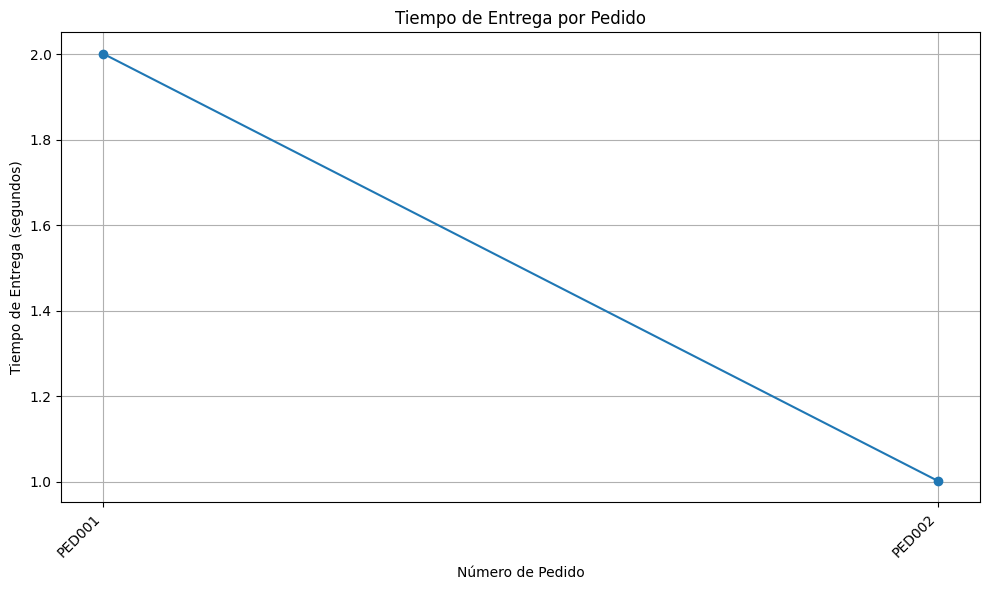

In [14]:
import matplotlib.pyplot as plt
import datetime

# Asumiendo que ya has ejecutado el código de gestión de pedidos
# y tienes datos en el diccionario 'pedidos'

pedidos_entregados = {k: v for k, v in pedidos.items() if v["estado"] == "Entregado" and v["tiempo_entrega"] is not None}

if not pedidos_entregados:
    print("si hay pedidos entregados con tiempo de 30 min registrado para graficar.")
else:
    numeros_pedido = list(pedidos_entregados.keys())
    tiempos_entrega_segundos = [p["tiempo_entrega"].total_seconds() for p in pedidos_entregados.values()]

    # Convertir segundos a un formato más legible si es necesario (por ejemplo, minutos o horas)
    # Aquí lo dejaremos en segundos para simplicidad, pero puedes adaptarlo.

    plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura
    plt.plot(numeros_pedido, tiempos_entrega_segundos, marker='o', linestyle='-')

    plt.xlabel("Número de Pedido")
    plt.ylabel("Tiempo de Entrega (segundos)")
    plt.title("Tiempo de Entrega por Pedido")
    plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x para mayor claridad
    plt.tight_layout() # Ajusta el layout para evitar que las etiquetas se solapen
    plt.grid(True) # Añade una cuadrícula
    plt.show()

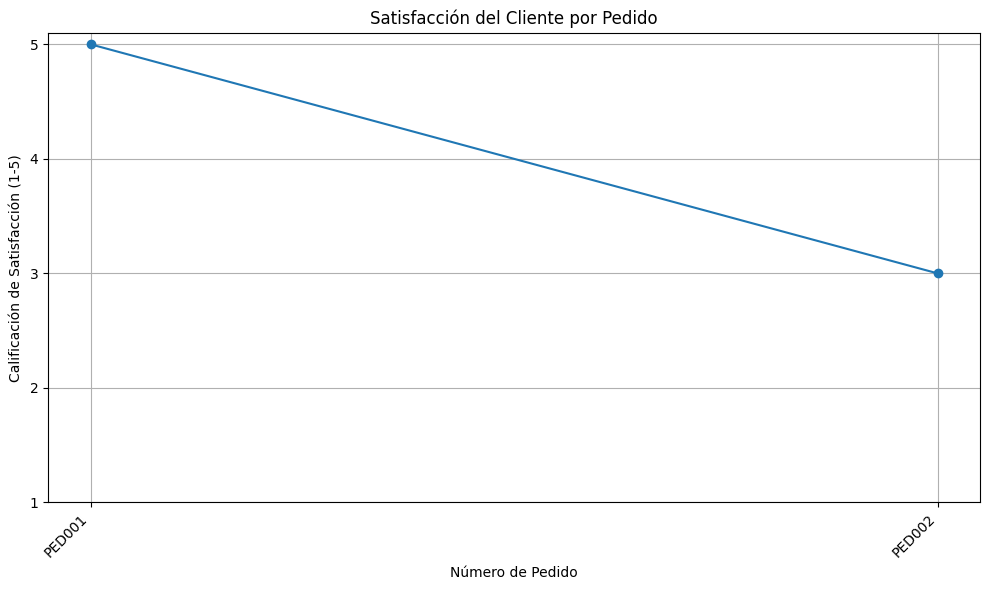

In [8]:
import matplotlib.pyplot as plt

# Asumiendo que ya has ejecutado el código de gestión de pedidos
# y tienes datos en el diccionario 'pedidos'

pedidos_con_satisfaccion = {k: v for k, v in pedidos.items() if v["estado"] == "Entregado" and v["satisfaccion_cliente"] is not None}

if not pedidos_con_satisfaccion:
     print("No hay pedidos entregados con satisfacción registrada para graficar.")
else:
    numeros_pedido = list(pedidos_con_satisfaccion.keys())
    calificaciones = [p["satisfaccion_cliente"] for p in pedidos_con_satisfaccion.values()]

    plt.figure(figsize=(10, 6))
    plt.plot(numeros_pedido, calificaciones, marker='o', linestyle='-')

    plt.xlabel("Número de Pedido")
    plt.ylabel("Calificación de Satisfacción (1-5)")
    plt.title("Satisfacción del Cliente por Pedido")
    plt.xticks(rotation=45, ha='right')
    plt.yticks([1, 2, 3, 4, 5]) # Asegura que las marcas del eje y sean las calificaciones posibles
    plt.tight_layout()
    plt.grid(True)
    plt.show()

In [15]:
import datetime

# Diccionario para almacenar los pedidos
pedidos = {}

# Variable global para el número de factura consecutivo
numero_consecutivo_factura = 0

# Diccionario para almacenar las facturas generadas
facturas_generadas = {}

# Diccionario para el menú de productos con categorías
menu_productos = {
    "Pizzas": [
        {"id": "P001", "nombre": "Pizza Pepperoni", "precio": 12.50},
        {"id": "P002", "nombre": "Pizza Margarita", "precio": 10.00},
        {"id": "P003", "nombre": "Pizza Hawaiana", "precio": 13.00},
        {"id": "P004", "nombre": "Pizza Vegetariana", "precio": 11.50},
    ],
    "Hamburguesas": [
        {"id": "H001", "nombre": "Hamburguesa Clásica", "precio": 8.00},
        {"id": "H002", "nombre": "Hamburguesa con Queso", "precio": 8.50},
        {"id": "H003", "nombre": "Hamburguesa Doble", "precio": 11.00},
        {"id": "H004", "nombre": "Hamburguesa Vegana", "precio": 9.00},
    ],
    "Pastas": [
        {"id": "PA001", "nombre": "Espagueti a la Carbonara", "precio": 14.00},
        {"id": "PA002", "nombre": "Lasaña Boloñesa", "precio": 15.50},
        {"id": "PA003", "nombre": "Fetuccini Alfredo", "precio": 13.50},
        {"id": "PA004", "nombre": "Ravioles de Queso", "precio": 14.50},
    ],
     "Bebidas": [
        {"id": "B001", "nombre": "Coca-Cola (Lata)", "precio": 2.50},
        {"id": "B002", "nombre": "Agua Embotellada", "precio": 1.50},
        {"id": "B003", "nombre": "Jugo de Naranja", "precio": 3.00},
        {"id": "B004", "nombre": "Limonada", "precio": 3.00},
     ],
    "Postres": [
        {"id": "D001", "nombre": "Tiramisú", "precio": 6.00},
        {"id": "D002", "nombre": "Brownie con Helado", "precio": 7.00},
        {"id": "D003", "nombre": "Pastel de Chocolate", "precio": 5.50},
        {"id": "D004", "nombre": "Helado (porción)", "precio": 4.00},
    ]
}

# Costo fijo del domicilio
costo_domicilio = 3.00

def mostrar_menu():
    """Muestra el menú de productos por categorías."""
    print("\n--- Menú de Productos ---")
    for categoria, productos in menu_productos.items():
        print(f"\n--- {categoria} ---")
        for producto in productos:
            print(f"ID: {producto['id']} - {producto['nombre']} - ${producto['precio']:.2f}")
    print("-------------------------")

def obtener_producto_por_id(producto_id):
    """Busca un producto en el menú por su ID."""
    for categoria, productos in menu_productos.items():
        for producto in productos:
            if producto["id"] == producto_id:
                return producto
    return None # Retorna None si no encuentra el producto

def crear_pedido(numero_pedido, cliente, items_pedido):
    """
    Crea un nuevo pedido.
    items_pedido es una lista de diccionarios: [{"id_producto": "...", "cantidad": ...}]
    """
    if numero_pedido in pedidos:
        print(f"Error: El pedido {numero_pedido} ya existe.")
        return

    productos_en_pedido = []
    subtotal = 0

    for item in items_pedido:
        producto_info = obtener_producto_por_id(item["id_producto"])
        if producto_info:
            producto_para_pedido = {
                "id": producto_info["id"],
                "nombre": producto_info["nombre"],
                "precio": producto_info["precio"],
                "cantidad": item["cantidad"]
            }
            productos_en_pedido.append(producto_para_pedido)
            subtotal += producto_info["precio"] * item["cantidad"]
        else:
            print(f"Advertencia: Producto con ID {item['id_producto']} no encontrado en el menú.")

    total_pedido = subtotal + costo_domicilio # Suma el costo del domicilio

    pedidos[numero_pedido] = {
        "cliente": cliente,
        "productos": productos_en_pedido,
        "estado": "Pedido tomado",
        "historial_trazabilidad": [
            {"estado": "Pedido tomado", "fecha_hora": datetime.datetime.now()}
        ],
        "factura": None,
        "tiempo_entrega": None,
        "satisfaccion_cliente": None,
        "subtotal": subtotal, # Guardar el subtotal (sin domicilio)
        "total_con_domicilio": total_pedido # Guardar el total con domicilio
    }
    print(f"Pedido {numero_pedido} creado para {cliente}. Total (incl. domicilio): ${total_pedido:.2f}")

def actualizar_estado_pedido(numero_pedido, nuevo_estado):
    """Actualiza el estado de un pedido y registra la trazabilidad, calculando tiempo de entrega si se entrega."""
    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    estados_validos = ["En preparación", "En reparto", "Entregado", "Cancelado"]
    if nuevo_estado not in estados_validos:
        print(f"Error: Estado '{nuevo_estado}' inválido.")
        return

    now = datetime.datetime.now()
    pedidos[numero_pedido]["historial_trazabilidad"].append(
        {"estado": nuevo_estado, "fecha_hora": now}
    )

    if nuevo_estado == "Entregado":
        fecha_creacion = pedidos[numero_pedido]["historial_trazabilidad"][0]["fecha_hora"]
        tiempo_entrega = now - fecha_creacion
        pedidos[numero_pedido]["tiempo_entrega"] = tiempo_entrega
        print(f"Pedido {numero_pedido} entregado en {tiempo_entrega}.")

    pedidos[numero_pedido]["estado"] = nuevo_estado
    print(f"Estado del pedido {numero_pedido} actualizado a '{nuevo_estado}'.")

def registrar_satisfaccion(numero_pedido, calificacion):
    """Registra la calificación de satisfacción del cliente para un pedido."""
    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    if pedidos[numero_pedido]["estado"] != "Entregado":
        print(f"Error: La satisfacción solo se puede registrar para pedidos entregados.")
        return

    if not 1 <= calificacion <= 5:
        print(f"Error: La calificación debe estar entre 1 y 5.")
        return

    pedidos[numero_pedido]["satisfaccion_cliente"] = calificacion
    print(f"Satisfacción del cliente registrada para el pedido {numero_pedido}: {calificacion}/5")


def generar_factura(numero_pedido):
    """Genera una factura simple para un pedido con un número consecutivo."""
    global numero_consecutivo_factura # Accedemos a la variable global

    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    if pedidos[numero_pedido]["factura"]:
        print(f"El pedido {numero_pedido} ya tiene una factura generada: {pedidos[numero_pedido]['factura']['numero_factura']}")
        return

    # Incrementamos el número consecutivo
    numero_consecutivo_factura += 1
    numero_factura = f"FAC-{numero_consecutivo_factura:06d}" # Formato con ceros a la izquierda

    factura = {
        "numero_factura": numero_factura,
        "fecha": datetime.date.today(),
        "cliente": pedidos[numero_pedido]["cliente"],
        "productos": pedidos[numero_pedido]["productos"],
        "subtotal": pedidos[numero_pedido]["subtotal"], # Usar el subtotal calculado al crear el pedido
        "costo_domicilio": costo_domicilio, # Incluir el costo del domicilio en la factura
        "total_factura": pedidos[numero_pedido]["total_con_domicilio"], # Usar el total con domicilio calculado
        "numero_pedido_asociado": numero_pedido # Opcional: guardar el número de pedido asociado
    }

    pedidos[numero_pedido]["factura"] = factura
    facturas_generadas[numero_factura] = factura # Almacenamos la factura en el nuevo diccionario

    print(f"Factura generada para el pedido {numero_pedido}: {factura['numero_factura']}")

def ver_trazabilidad(numero_pedido):
    """Muestra el historial de trazabilidad de un pedido."""
    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    print(f"\nTrazabilidad del pedido {numero_pedido} para {pedidos[numero_pedido]['cliente']}:")
    for registro in pedidos[numero_pedido]["historial_trazabilidad"]:
        print(f"- {registro['fecha_hora'].strftime('%Y-%m-%d %H:%M:%S')} - {registro['estado']}")

def ver_pedido(numero_pedido):
    """Muestra los detalles de un pedido, incluyendo la factura si existe y las estadísticas de satisfacción."""
    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    pedido = pedidos[numero_pedido]
    print(f"\nDetalles del pedido {numero_pedido}:")
    print(f"Cliente: {pedido['cliente']}")
    print("Productos:")
    for producto in pedido['productos']:
        print(f"  - {producto['nombre']}: {producto['cantidad']} x ${producto['precio']:.2f}")
    print(f"Estado actual: {pedido['estado']}")
    print(f"Subtotal: ${pedido['subtotal']:.2f}")
    print(f"Costo del domicilio: ${costo_domicilio:.2f}")
    print(f"Total con domicilio: ${pedido['total_con_domicilio']:.2f}")


    if pedido['factura']:
        factura = pedido['factura']
        print("\nFactura:")
        print(f"  Número de Factura: {factura['numero_factura']}")
        print(f"  Fecha: {factura['fecha']}")
        print(f"  Subtotal: ${factura['subtotal']:.2f}")
        print(f"  Costo del domicilio: ${factura['costo_domicilio']:.2f}")
        print(f"  Total Factura: ${factura['total_factura']:.2f}")


    if pedido['tiempo_entrega'] is not None:
        print(f"Tiempo de entrega: {pedido['tiempo_entrega']}")

    if pedido['satisfaccion_cliente'] is not None:
        print(f"Satisfacción del cliente: {pedido['satisfaccion_cliente']}/5")

def ver_factura(numero_factura):
    """Muestra los detalles de una factura específica."""
    if numero_factura not in facturas_generadas:
        print(f"Error: La factura {numero_factura} no existe.")
        return

    factura = facturas_generadas[numero_factura]
    print(f"\nDetalles de la factura {numero_factura}:")
    print(f"Fecha: {factura['fecha']}")
    print(f"Cliente: {factura['cliente']}")
    print("Productos:")
    for producto in factura['productos']:
        print(f"  - {producto['nombre']}: {producto['cantidad']} x ${producto['precio']:.2f}")
    print(f"Subtotal: ${factura['subtotal']:.2f}")
    print(f"Costo del domicilio: ${factura['costo_domicilio']:.2f}")
    print(f"Total Factura: ${factura['total_factura']:.2f}")
    if 'numero_pedido_asociado' in factura:
        print(f"Pedido asociado: {factura['numero_pedido_asociado']}")


# --- Ejemplo de uso con menú y domicilio ---

# Mostrar el menú
mostrar_menu()

# Tomar un pedido seleccionando productos del menú
items_primer_pedido = [
    {"id_producto": "P001", "cantidad": 1}, # Una Pizza Pepperoni
    {"id_producto": "B001", "cantidad": 2}, # Dos Coca-Cola (Lata)
    {"id_producto": "D001", "cantidad": 1}  # Un Tiramisú
]
crear_pedido("PED001", "Cliente A", items_primer_pedido)

# Tomar un segundo pedido
items_segundo_pedido = [
    {"id_producto": "H003", "cantidad": 1}, # Una Hamburguesa Doble
    {"id_producto": "PA001", "cantidad": 1},# Un Espagueti a la Carbonara
    {"id_producto": "B002", "cantidad": 3}  # Tres Agua Embotellada
]
crear_pedido("PED002", "Cliente B", items_segundo_pedido)

# Generar facturas
generar_factura("PED001")
generar_factura("PED002")

# Ver los detalles de los pedidos y sus facturas
ver_pedido("PED001")
ver_pedido("PED002")

# Ver una factura específica
ver_factura("FAC-000001")


--- Menú de Productos ---

--- Pizzas ---
ID: P001 - Pizza Pepperoni - $12.50
ID: P002 - Pizza Margarita - $10.00
ID: P003 - Pizza Hawaiana - $13.00
ID: P004 - Pizza Vegetariana - $11.50

--- Hamburguesas ---
ID: H001 - Hamburguesa Clásica - $8.00
ID: H002 - Hamburguesa con Queso - $8.50
ID: H003 - Hamburguesa Doble - $11.00
ID: H004 - Hamburguesa Vegana - $9.00

--- Pastas ---
ID: PA001 - Espagueti a la Carbonara - $14.00
ID: PA002 - Lasaña Boloñesa - $15.50
ID: PA003 - Fetuccini Alfredo - $13.50
ID: PA004 - Ravioles de Queso - $14.50

--- Bebidas ---
ID: B001 - Coca-Cola (Lata) - $2.50
ID: B002 - Agua Embotellada - $1.50
ID: B003 - Jugo de Naranja - $3.00
ID: B004 - Limonada - $3.00

--- Postres ---
ID: D001 - Tiramisú - $6.00
ID: D002 - Brownie con Helado - $7.00
ID: D003 - Pastel de Chocolate - $5.50
ID: D004 - Helado (porción) - $4.00
-------------------------
Pedido PED001 creado para Cliente A. Total (incl. domicilio): $26.50
Pedido PED002 creado para Cliente B. Total (incl. do

In [16]:
import datetime

# Diccionario para almacenar los pedidos
pedidos = {}

# Variable global para el número de factura consecutivo
numero_consecutivo_factura = 0

# Diccionario para almacenar las facturas generadas
facturas_generadas = {}

# Diccionario para el menú de productos con categorías
menu_productos = {
    "Pizzas": [
        {"id": "P001", "nombre": "Pizza Pepperoni", "precio": 12.50},
        {"id": "P002", "nombre": "Pizza Margarita", "precio": 10.00},
        {"id": "P003", "nombre": "Pizza Hawaiana", "precio": 13.00},
        {"id": "P004", "nombre": "Pizza Vegetariana", "precio": 11.50},
    ],
    "Hamburguesas": [
        {"id": "H001", "nombre": "Hamburguesa Clásica", "precio": 8.00},
        {"id": "H002", "nombre": "Hamburguesa con Queso", "precio": 8.50},
        {"id": "H003", "nombre": "Hamburguesa Doble", "precio": 11.00},
        {"id": "H004", "nombre": "Hamburguesa Vegana", "precio": 9.00},
    ],
    "Pastas": [
        {"id": "PA001", "nombre": "Espagueti a la Carbonara", "precio": 14.00},
        {"id": "PA002", "nombre": "Lasaña Boloñesa", "precio": 15.50},
        {"id": "PA003", "nombre": "Fetuccini Alfredo", "precio": 13.50},
        {"id": "PA004", "nombre": "Ravioles de Queso", "precio": 14.50},
    ],
     "Bebidas": [
        {"id": "B001", "nombre": "Coca-Cola (Lata)", "precio": 2.50},
        {"id": "B002", "nombre": "Agua Embotellada", "precio": 1.50},
        {"id": "B003", "nombre": "Jugo de Naranja", "precio": 3.00},
        {"id": "B004", "nombre": "Limonada", "precio": 3.00},
     ],
    "Postres": [
        {"id": "D001", "nombre": "Tiramisú", "precio": 6.00},
        {"id": "D002", "nombre": "Brownie con Helado", "precio": 7.00},
        {"id": "D003", "nombre": "Pastel de Chocolate", "precio": 5.50},
        {"id": "D004", "nombre": "Helado (porción)", "precio": 4.00},
    ]
}

# Costo fijo del domicilio
costo_domicilio = 3.00

def mostrar_menu():
    """Muestra el menú de productos por categorías."""
    print("\n--- Menú de Productos ---")
    for categoria, productos in menu_productos.items():
        print(f"\n--- {categoria} ---")
        for producto in productos:
            print(f"ID: {producto['id']} - {producto['nombre']} - ${producto['precio']:.2f}")
    print("-------------------------")

def obtener_producto_por_id(producto_id):
    """Busca un producto en el menú por su ID."""
    for categoria, productos in menu_productos.items():
        for producto in productos:
            if producto["id"] == producto_id:
                return producto
    return None # Retorna None si no encuentra el producto

def crear_pedido(numero_pedido, datos_cliente, items_pedido):
    """
    Crea un nuevo pedido con datos del cliente y productos del menú.
    datos_cliente es un diccionario: {"nombre": "...", "cedula": "...", "telefono": "...", "email": "...", "direccion": "..."}
    items_pedido es una lista de diccionarios: [{"id_producto": "...", "cantidad": ...}]
    """
    if numero_pedido in pedidos:
        print(f"Error: El pedido {numero_pedido} ya existe.")
        return

    productos_en_pedido = []
    subtotal = 0

    for item in items_pedido:
        producto_info = obtener_producto_por_id(item["id_producto"])
        if producto_info:
            producto_para_pedido = {
                "id": producto_info["id"],
                "nombre": producto_info["nombre"],
                "precio": producto_info["precio"],
                "cantidad": item["cantidad"]
            }
            productos_en_pedido.append(producto_para_pedido)
            subtotal += producto_info["precio"] * item["cantidad"]
        else:
            print(f"Advertencia: Producto con ID {item['id_producto']} no encontrado en el menú.")

    total_pedido = subtotal + costo_domicilio # Suma el costo del domicilio

    pedidos[numero_pedido] = {
        "cliente": datos_cliente, # Almacenar los datos del cliente como un diccionario
        "productos": productos_en_pedido,
        "estado": "Pedido tomado",
        "historial_trazabilidad": [
            {"estado": "Pedido tomado", "fecha_hora": datetime.datetime.now()}
        ],
        "factura": None,
        "tiempo_entrega": None,
        "satisfaccion_cliente": None,
        "subtotal": subtotal,
        "total_con_domicilio": total_pedido
    }
    print(f"Pedido {numero_pedido} creado para {datos_cliente['nombre']}. Total (incl. domicilio): ${total_pedido:.2f}")

def actualizar_estado_pedido(numero_pedido, nuevo_estado):
    """Actualiza el estado de un pedido y registra la trazabilidad, calculando tiempo de entrega si se entrega."""
    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    estados_validos = ["En preparación", "En reparto", "Entregado", "Cancelado"]
    if nuevo_estado not in estados_validos:
        print(f"Error: Estado '{nuevo_estado}' inválido.")
        return

    now = datetime.datetime.now()
    pedidos[numero_pedido]["historial_trazabilidad"].append(
        {"estado": nuevo_estado, "fecha_hora": now}
    )

    if nuevo_estado == "Entregado":
        fecha_creacion = pedidos[numero_pedido]["historial_trazabilidad"][0]["fecha_hora"]
        tiempo_entrega = now - fecha_creacion
        pedidos[numero_pedido]["tiempo_entrega"] = tiempo_entrega
        print(f"Pedido {numero_pedido} entregado en {tiempo_entrega}.")

    pedidos[numero_pedido]["estado"] = nuevo_estado
    print(f"Estado del pedido {numero_pedido} actualizado a '{nuevo_estado}'.")

def registrar_satisfaccion(numero_pedido, calificacion):
    """Registra la calificación de satisfacción del cliente para un pedido."""
    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    if pedidos[numero_pedido]["estado"] != "Entregado":
        print(f"Error: La satisfacción solo se puede registrar para pedidos entregados.")
        return

    if not 1 <= calificacion <= 5:
        print(f"Error: La calificación debe estar entre 1 y 5.")
        return

    pedidos[numero_pedido]["satisfaccion_cliente"] = calificacion
    print(f"Satisfacción del cliente registrada para el pedido {numero_pedido}: {calificacion}/5")


def generar_factura(numero_pedido):
    """Genera una factura simple para un pedido con un número consecutivo."""
    global numero_consecutivo_factura # Accedemos a la variable global

    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    if pedidos[numero_pedido]["factura"]:
        print(f"El pedido {numero_pedido} ya tiene una factura generada: {pedidos[numero_pedido]['factura']['numero_factura']}")
        return

    # Incrementamos el número consecutivo
    numero_consecutivo_factura += 1
    numero_factura = f"FAC-{numero_consecutivo_factura:06d}" # Formato con ceros a la izquierda

    pedido = pedidos[numero_pedido]

    factura = {
        "numero_factura": numero_factura,
        "fecha": datetime.date.today(),
        "cliente": pedido["cliente"], # Incluir todos los datos del cliente en la factura
        "productos": pedido["productos"],
        "subtotal": pedido["subtotal"],
        "costo_domicilio": costo_domicilio,
        "total_factura": pedido["total_con_domicilio"],
        "numero_pedido_asociado": numero_pedido
    }

    pedido["factura"] = factura
    facturas_generadas[numero_factura] = factura # Almacenamos la factura en el nuevo diccionario

    print(f"Factura generada para el pedido {numero_pedido}: {factura['numero_factura']}")

def ver_trazabilidad(numero_pedido):
    """Muestra el historial de trazabilidad de un pedido."""
    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    print(f"\nTrazabilidad del pedido {numero_pedido} para {pedidos[numero_pedido]['cliente']['nombre']}:")
    for registro in pedidos[numero_pedido]["historial_trazabilidad"]:
        print(f"- {registro['fecha_hora'].strftime('%Y-%m-%d %H:%M:%S')} - {registro['estado']}")

def ver_pedido(numero_pedido):
    """Muestra los detalles de un pedido, incluyendo la factura si existe y las estadísticas de satisfacción."""
    if numero_pedido not in pedidos:
        print(f"Error: El pedido {numero_pedido} no existe.")
        return

    pedido = pedidos[numero_pedido]
    print(f"\nDetalles del pedido {numero_pedido}:")
    print(f"Cliente: {pedido['cliente']['nombre']}")
    print(f"Cédula: {pedido['cliente']['cedula']}")
    print(f"Teléfono: {pedido['cliente']['telefono']}")
    print(f"Correo Electrónico: {pedido['cliente']['email']}")
    print(f"Dirección: {pedido['cliente']['direccion']}")
    print("Productos:")
    for producto in pedido['productos']:
        print(f"  - {producto['nombre']}: {producto['cantidad']} x ${producto['precio']:.2f}")
    print(f"Estado actual: {pedido['estado']}")
    print(f"Subtotal: ${pedido['subtotal']:.2f}")
    print(f"Costo del domicilio: ${costo_domicilio:.2f}")
    print(f"Total con domicilio: ${pedido['total_con_domicilio']:.2f}")

    if pedido['factura']:
        factura = pedido['factura']
        print("\nFactura:")
        print(f"  Número de Factura: {factura['numero_factura']}")
        print(f"  Fecha: {factura['fecha']}")
        print(f"  Cliente (Factura): {factura['cliente']['nombre']}") # Mostrar nombre del cliente en factura
        print(f"  Subtotal: ${factura['subtotal']:.2f}")
        print(f"  Costo del domicilio: ${factura['costo_domicilio']:.2f}")
        print(f"  Total Factura: ${factura['total_factura']:.2f}")

    if pedido['tiempo_entrega'] is not None:
        print(f"Tiempo de entrega: {pedido['tiempo_entrega']}")

    if pedido['satisfaccion_cliente'] is not None:
        print(f"Satisfacción del cliente: {pedido['satisfaccion_cliente']}/5")

def ver_factura(numero_factura):
    """Muestra los detalles de una factura específica."""
    if numero_factura not in facturas_generadas:
        print(f"Error: La factura {numero_factura} no existe.")
        return

    factura = facturas_generadas[numero_factura]
    print(f"\nDetalles de la factura {numero_factura}:")
    print(f"Fecha: {factura['fecha']}")
    print(f"Cliente: {factura['cliente']['nombre']}") # Mostrar nombre del cliente en detalles de factura
    print(f"Cédula: {factura['cliente']['cedula']}")
    print(f"Teléfono: {factura['cliente']['telefono']}")
    print(f"Correo Electrónico: {factura['cliente']['email']}")
    print(f"Dirección de Entrega: {factura['cliente']['direccion']}")
    print("Productos:")
    for producto in factura['productos']:
        print(f"  - {producto['nombre']}: {producto['cantidad']} x ${producto['precio']:.2f}")
    print(f"Subtotal: ${factura['subtotal']:.2f}")
    print(f"Costo del domicilio: ${factura['costo_domicilio']:.2f}")
    print(f"Total Factura: ${factura['total_factura']:.2f}")
    if 'numero_pedido_asociado' in factura:
        print(f"Pedido asociado: {factura['numero_pedido_asociado']}")


# --- Ejemplo de uso con menú, domicilio y datos del cliente ---

# Mostrar el menú
mostrar_menu()

# Datos del primer cliente
datos_cliente_a = {
    "nombre": "Ana García",
    "cedula": "1010101010",
    "telefono": "3001234567",
    "email": "ana.garcia@email.com",
    "direccion": "Calle Falsa 123"
}

# Tomar un pedido para el primer cliente
items_primer_pedido = [
    {"id_producto": "P001", "cantidad": 1}, # Una Pizza Pepperoni
    {"id_producto": "B001", "cantidad": 2}, # Dos Coca-Cola (Lata)
    {"id_producto": "D001", "cantidad": 1}  # Un Tiramisú
]
crear_pedido("PED001", datos_cliente_a, items_primer_pedido)

# Datos del segundo cliente
datos_cliente_b = {
    "nombre": "Juan Pérez",
    "cedula": "2020202020",
    "telefono": "3109876543",
    "email": "juan.perez@email.com",
    "direccion": "Avenida Siempre Viva 742"
}

# Tomar un segundo pedido para el segundo cliente
items_segundo_pedido = [
    {"id_producto": "H003", "cantidad": 1}, # Una Hamburguesa Doble
    {"id_producto": "PA001", "cantidad": 1},# Un Espagueti a la Carbonara
    {"id_producto": "B002", "cantidad": 3}  # Tres Agua Embotellada
]
crear_pedido("PED002", datos_cliente_b, items_segundo_pedido)

# Generar facturas
generar_factura("PED001")
generar_factura("PED002")

# Ver los detalles de los pedidos y sus facturas
ver_pedido("PED001")
ver_pedido("PED002")

# Ver una factura específica
ver_factura("FAC-000001")
ver_factura("FAC-000002")


--- Menú de Productos ---

--- Pizzas ---
ID: P001 - Pizza Pepperoni - $12.50
ID: P002 - Pizza Margarita - $10.00
ID: P003 - Pizza Hawaiana - $13.00
ID: P004 - Pizza Vegetariana - $11.50

--- Hamburguesas ---
ID: H001 - Hamburguesa Clásica - $8.00
ID: H002 - Hamburguesa con Queso - $8.50
ID: H003 - Hamburguesa Doble - $11.00
ID: H004 - Hamburguesa Vegana - $9.00

--- Pastas ---
ID: PA001 - Espagueti a la Carbonara - $14.00
ID: PA002 - Lasaña Boloñesa - $15.50
ID: PA003 - Fetuccini Alfredo - $13.50
ID: PA004 - Ravioles de Queso - $14.50

--- Bebidas ---
ID: B001 - Coca-Cola (Lata) - $2.50
ID: B002 - Agua Embotellada - $1.50
ID: B003 - Jugo de Naranja - $3.00
ID: B004 - Limonada - $3.00

--- Postres ---
ID: D001 - Tiramisú - $6.00
ID: D002 - Brownie con Helado - $7.00
ID: D003 - Pastel de Chocolate - $5.50
ID: D004 - Helado (porción) - $4.00
-------------------------
Pedido PED001 creado para Ana García. Total (incl. domicilio): $26.50
Pedido PED002 creado para Juan Pérez. Total (incl. 